# 01. PyTorch Workflow Fundamentals

You: have some data + want it modelled.

Let's do that with PyTorch.

How about we start with a straight line?

And we see if we can build a model with PyTorch to predict that straight line.

## TK - What we're going to cover

1. Data (prepare and load)
2. Build model
3. Fitting model to data (training)
4. Making predictions and evaluating a model (inference)
    * Improving a model through experimentations (optional)
5. Saving and loading model
6. Putting it all together



In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## TK - Data

Let's create the data as a straight line.

We'll use linear regression to create the data with known parameters and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

TK - the essence of machine learning (and deep learning) is to create model that's able to estimate some function, a function being a way to navigate patterns in data.



In [40]:
weight = 7
bias = 3
start = 0
end = 1000
step = 5

# Create data
torch.manual_seed(42)
X = torch.arange(start, end, step)
y = weight * X + bias

X[:10], y[:10]

(tensor([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45]),
 tensor([  3,  38,  73, 108, 143, 178, 213, 248, 283, 318]))

In [41]:
# Get data between 0 & 1 (neural networks like data between 0 & 1)
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_scaled = min_max.fit_transform(X.numpy().reshape(-1, 1))
X_scaled[:10]

array([[0.        ],
       [0.00502513],
       [0.01005025],
       [0.01507538],
       [0.0201005 ],
       [0.02512563],
       [0.03015075],
       [0.03517588],
       [0.04020101],
       [0.04522613]])

TK - explain: 
* torch.squeeze() - remove extra dimension
* torch.from_numpy() - convert numpy array to torch tensor
* .type() - convert default Numpy array datatype of float64 to torch.float (float32) 

In [42]:
# Get scaled data back to PyTorch type
X_scaled = torch.squeeze(torch.from_numpy(X_scaled)).type(dtype=torch.float)

X_scaled[:10]

tensor([0.0000, 0.0050, 0.0101, 0.0151, 0.0201, 0.0251, 0.0302, 0.0352, 0.0402,
        0.0452])

In [43]:
# Create train/test split
train_split = int(0.8 * len(X_scaled)) # 80% of data used for training set
X_train, y_train = X_scaled[:train_split], y[:train_split]
X_test, y_test = X_scaled[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

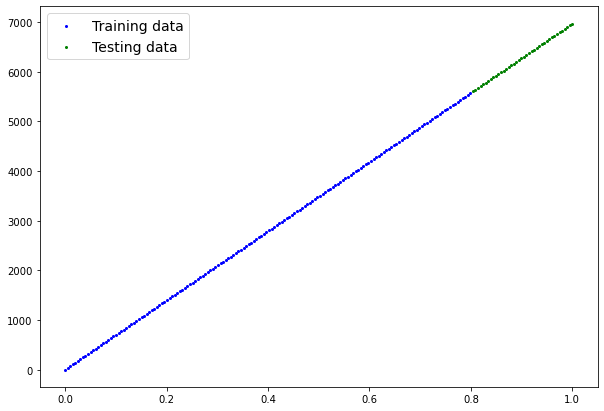

In [48]:
# Plot train/test data
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")

# Show legend
plt.legend(prop={"size": 14});

## Build model

Now we've got some data, let's build a model to use the blue dots to predict the green dots.

TK - In PyTorch everything to do with models is considered a Module (from nn.Module)... 

In [58]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1,
            requires_grad=True, 
            dtype=torch.float
        ))

        self.bias = nn.Parameter(torch.randn(1, 
            requires_grad=True,
            dtype=torch.float
        ))

    # Forward defines the computation in the model
    def forward(self, x):
        return self.weights * x + self.bias

In [62]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [65]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

We want to start from random parameters and get the model to update them towards parameters that fit our data best (the original `weight` and `bias` values).

In [63]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# UPTOHERE... 

* Use model to make predictions
* Get data/model on device etc...
* Go through steps above